In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Load the datasets
google_ads_df = pd.read_csv('googlead-performance.csv')
meta_ads_df = pd.read_csv('metaads-performance.csv')
microsoft_ads_df = pd.read_csv('microsoftads-performance.csv')
website_landings_df = pd.read_csv('website-landings.csv')


In [3]:
# Convert date columns to datetime
google_ads_df['Date'] = pd.to_datetime(google_ads_df['Date'])
meta_ads_df['Date'] = pd.to_datetime(meta_ads_df['Date'])
microsoft_ads_df['Date'] = pd.to_datetime(microsoft_ads_df['Date'])
website_landings_df['Website Landing Time'] = pd.to_datetime(website_landings_df['Website Landing Time'])

In [4]:

google_ads_df.fillna(0, inplace=True)
meta_ads_df.fillna(0, inplace=True)
microsoft_ads_df.fillna(0, inplace=True)
website_landings_df.fillna(0, inplace=True)


In [5]:

# Calculate CTR and CPC for ad data
google_ads_df['CTR'] = google_ads_df['Clicks'] / google_ads_df['Impressions']
google_ads_df['CPC'] = google_ads_df['Cost'] / google_ads_df['Clicks']



In [6]:
meta_ads_df['CTR'] = meta_ads_df['Clicks'] / meta_ads_df['Impressions']
meta_ads_df['CPC'] = meta_ads_df['Cost'] / meta_ads_df['Clicks']

microsoft_ads_df['CTR'] = microsoft_ads_df['Clicks'] / microsoft_ads_df['Impressions']
microsoft_ads_df['CPC'] = microsoft_ads_df['Cost'] / microsoft_ads_df['Clicks']


In [7]:
# Aggregate website landings data
landing_agg = website_landings_df.groupby(['Source', 'Channel', 'Campaign Type']).agg({
    'User Id': 'count',
    'Is Converted': 'sum'
}).reset_index().rename(columns={'User Id': 'Total Landings', 'Is Converted': 'Total Conversions'})


In [8]:

# Prepare data for modeling
features = ['Impressions', 'Clicks', 'Cost', 'CTR', 'CPC']
target = 'Conversions'

X = google_ads_df[features]
y = google_ads_df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a model
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
# Evaluate the model
predictions = model.predict(X_test)

In [12]:
# Define a function to allocate budget
def allocate_budget(total_budget, channel_performance):
    allocation = {}
    for channel, performance in channel_performance.items():
        allocation[channel] = total_budget * (performance / sum(channel_performance.values()))
    return allocation


In [13]:

# Example channel performance based on model insights
channel_performance = {
    'Google Ads': model.predict(X_test).sum(),
    'Meta Ads': meta_ads_df['Conversions'].sum(),
    'Microsoft Ads': microsoft_ads_df['Conversions'].sum()
}

total_budget = 200000  # Total allocated budget
budget_allocation = allocate_budget(total_budget, channel_performance)


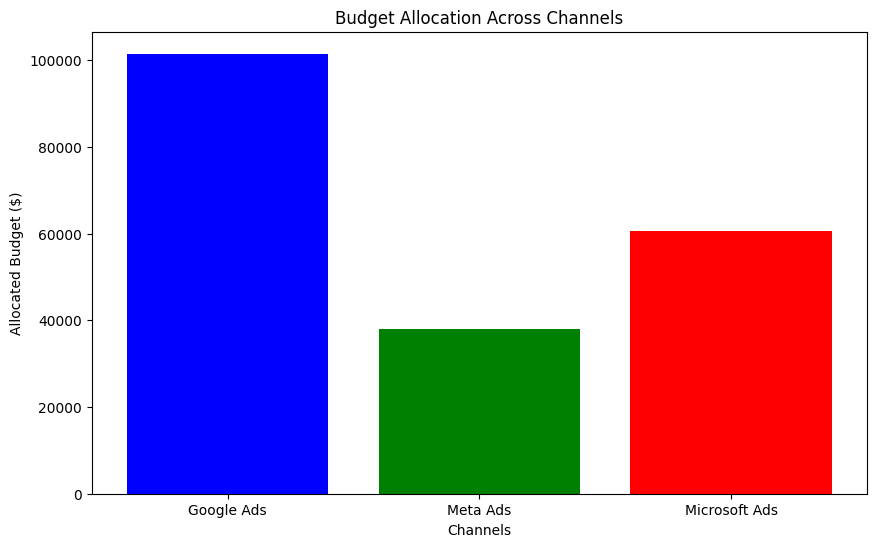

In [14]:

# Visualize the budget allocation
channels = list(budget_allocation.keys())
budgets = list(budget_allocation.values())

plt.figure(figsize=(10, 6))
plt.bar(channels, budgets, color=['blue', 'green', 'red'])
plt.xlabel('Channels')
plt.ylabel('Allocated Budget ($)')
plt.title('Budget Allocation Across Channels')
plt.show()


In [15]:

# Conclusion
print("Budget Allocation:")
for channel, budget in budget_allocation.items():
    print(f"{channel}: ${budget:.2f}")


Budget Allocation:
Google Ads: $101489.60
Meta Ads: $37960.59
Microsoft Ads: $60549.81
